In [35]:
%pip install seaborn matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
import pandas as pd
import yfinance as yf
import datetime as dt

# list of assets (updated with our chosen assets):
# Companies: Salesforce, HP, Lenovo, Ford, Tesla, Walmart, Target 
my_tickers = ["crm", "hpq", "lnvgy", "f", "tsla", "wmt", "tgt"]
etf_tickers = ["spy", "iwm", "dia"]

my_tickers, etf_tickers = [ticker.upper() for ticker in my_tickers], [etf.upper() for etf in etf_tickers]

# Assign a start date and end date for the data download, 1 year of data
start_date = dt.datetime.today() - pd.Timedelta(400, "d")
end_date = dt.datetime.today()

In [38]:
## Now download the data using the above variables, my_port is short for my portfolio. The portfolio consists of stock and etf data.
my_port = yf.download(start=start_date, end=end_date, tickers=my_tickers + etf_tickers)

c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[**********            20%%                      ]  2 of 10 completedc:\Users\samue\AppData\Local\Pr

In [39]:
## And review the data:
my_port.head()

Price        Adj Close                                                \
Ticker             CRM         DIA          F        HPQ         IWM   
Date                                                                   
2023-02-13  170.856812  334.596222  12.262090  29.005663  189.772293   
2023-02-14  169.738281  333.219055  12.149679  29.063023  189.683609   
2023-02-15  170.876801  333.726929  12.112209  29.187307  191.604980   
2023-02-16  167.890686  329.556061  12.093474  28.938742  189.772293   
2023-02-17  164.954529  330.976685  12.074739  28.833580  190.294510   

Price                                                                 ...  \
Ticker          LNVGY         SPY         TGT        TSLA        WMT  ...   
Date                                                                  ...   
2023-02-13  16.198263  405.389923  166.654068  194.639999  47.743355  ...   
2023-02-14  16.246130  405.203369  165.618744  209.250000  47.605930  ...   
2023-02-15  16.179115  406.519196  170.311462  214.240005  47.959324  ...   
2023-02-16  17.040726  400.921936  168.879456  202.039993  47.206734  ...   
2023-02-17  16.475893  399.920319  167.602280  208.309998  47.916786  ...   

Price        Volume                                                         \
Ticker          CRM      DIA         F      HPQ       IWM  LNVGY       SPY   
Date                                                                         
2023-02-13  8820300  2653900  64201900  4280900  15754400  24400  64913500   
2023-02-14  8393100  3501100  75352900  5647800  21889600  59400  88389300   
2023-02-15  4997000  1967700  65850000  4269600  18721200  44400  61555700   
2023-02-16  7483500  3229600  64145500  3514200  21366300  42500  76431500   
2023-02-17  8084500  3034200  54401000  5758100  23892200  27200  89257800   

Price                                     
Ticker          TGT       TSLA       WMT  
Date                                      
2023-02-13  2432600  172475500  16015800  
2023-02-14  2418400  216455700  13831200  
2023-02-15  2954400  181006400  14674200  
2023-02-16  2318700  229586500  16312200  
2023-02-17  2678100  213738500  24770700  

[5 rows x 60 columns]

In [40]:
## We may only need one index of the multi-index that was returned (Adj Close)
my_port = my_port['Adj Close']

my_port.head()

Ticker,CRM,DIA,F,HPQ,IWM,LNVGY,SPY,TGT,TSLA,WMT
Date,,,,,,,,,,
2023-02-13,170.856812,334.596222,12.262090,29.005663,189.772293,16.198263,405.389923,166.654068,194.639999,47.743355
2023-02-14,169.738281,333.219055,12.149679,29.063023,189.683609,16.246130,405.203369,165.618744,209.250000,47.605930
2023-02-15,170.876801,333.726929,12.112209,29.187307,191.604980,16.179115,406.519196,170.311462,214.240005,47.959324
2023-02-16,167.890686,329.556061,12.093474,28.938742,189.772293,17.040726,400.921936,168.879456,202.039993,47.206734
2023-02-17,164.954529,330.976685,12.074739,28.833580,190.294510,16.475893,399.920319,167.602280,208.309998,47.916786


In [41]:
## Define a variable for daliy returns.
my_port_d_returns = my_port.pct_change()

In [42]:
## Create a pandas dataframe to hold values that are calculated into a table. Index the table with the 7 stocks.
my_port_table = pd.DataFrame(index = my_tickers)
    

In [43]:
## Calculation for 1a. and 1b. in the 1st project. Column of the tickers and portfolio weights. Revised calculation to change portfolio weight from decimal to whole number.
# Credit goes to the professor for this revision.

port_weight = 100 / len(my_tickers)
my_port_table['Portfolio_Weight'] = port_weight

my_port_table



,Portfolio_Weight
CRM,14.285714
HPQ,14.285714
LNVGY,14.285714
F,14.285714
TSLA,14.285714
WMT,14.285714
TGT,14.285714


In [44]:
## What I did to calculate 1c.(Annualized Volatility) before represented as a multi line comment.
'''
def get_stock_prices(my_tickers, start_date, end_date):
    my_port
    return my_port

stock_prices = get_stock_prices(my_tickers, start_date, end_date)
returns_3months = stock_prices.pct_change().rolling(window=63).sum().dropna()
volatility = returns_3months.std() * (252 ** 0.5)
result_df = pd.DataFrame({'Ticker': my_tickers, 'Volatility': volatility})

print(result_df)
'''

"\ndef get_stock_prices(my_tickers, start_date, end_date):\n    my_port\n    return my_port\n\nstock_prices = get_stock_prices(my_tickers, start_date, end_date)\nreturns_3months = stock_prices.pct_change().rolling(window=63).sum().dropna()\nvolatility = returns_3months.std() * (252 ** 0.5)\nresult_df = pd.DataFrame({'Ticker': my_tickers, 'Volatility': volatility})\n\nprint(result_df)\n"

In [45]:
## Calculation of 1c. based on how the professor did it.
my_port_table['Annualized Volatility'] = my_port_d_returns[-63:].std() * (252 ** (1/2)) * 100
my_port_table

,Portfolio_Weight,Annualized Volatility
CRM,14.285714,26.065368
HPQ,14.285714,22.282266
LNVGY,14.285714,46.141619
F,14.285714,34.063467
TSLA,14.285714,45.802131
WMT,14.285714,14.010689
TGT,14.285714,32.608805


In [46]:
## This is how we calculated 1d. to 1f. before represented as multi-line comments.
'''
## First download Adjusted Close Price data for S&P 500 ETF
spy = yf.download(start=start_date, end=end_date, tickers='SPY')
spy = spy['Adj Close']

## Combine portfolio and SPY data into a single DataFrame
my_port_and_spy_data = pd.concat([my_port, spy], axis=1)
my_port_and_spy_data.columns = my_tickers + ['SPY']

## Calculate daily returns
my_port_and_spy__d_returns = my_port_and_spy_data.pct_change().dropna()

## Calculate covariance matrix
my_port_and_spy_cov_matrix = my_port_and_spy__d_returns.cov()

## Extract covariances with SPY
cov_with_spy = my_port_and_spy_cov_matrix['SPY'].drop('SPY')  

## Calculate SPY variance
spy_variance = my_port_and_spy_cov_matrix.loc['SPY', 'SPY']

# Calculate beta
betas_spy = cov_with_spy / spy_variance

spy_beta_table = pd.DataFrame({'Tickers': my_tickers, 'Beta': betas_spy})
print(spy_beta_table)
'''

'''
## Then calculate the daily returns of portfolio and S&P 500 ETF
my_port_d_returns = prices.pct_change().dropna()
spy_d_returns = spy.pct_change().dropna()

covariances = my_port_d_returns.covwith(spy_d_returns)
'''



'\n## Then calculate the daily returns of portfolio and S&P 500 ETF\nmy_port_d_returns = prices.pct_change().dropna()\nspy_d_returns = spy.pct_change().dropna()\n\ncovariances = my_port_d_returns.covwith(spy_d_returns)\n'

In [47]:
### Calculation of 1d. to 1f. based on how the professor did it.
# First calculate covariance and variance for all assets and etfs by using return data.
ret_covs = my_port_d_returns[-252:].cov()
ret_vars = my_port_d_returns[-252:].var()

# Then loop through ETFs to calculate betas against assets.
for etf in etf_tickers:
    my_port_table[etf + "_beta"] = ret_covs[etf] / ret_vars[etf]

my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta
CRM,14.285714,26.065368,1.253743,0.520640,1.300970
HPQ,14.285714,22.282266,0.993016,0.599540,1.159920
LNVGY,14.285714,46.141619,0.853506,0.645373,0.891988
F,14.285714,34.063467,1.264359,0.916569,1.612678
TSLA,14.285714,45.802131,2.108953,1.049121,1.858428
WMT,14.285714,14.010689,0.324743,0.131307,0.469167
TGT,14.285714,32.608805,0.756434,0.598261,1.134271


In [48]:
## Now I will calculate the betas again by using adjusted close price data instead of daily return data to compare with the return data results.
## Also known as the backtest.
# First, calculate covariance and variance for all assets and etfs by using adjusted close price data.
raw_covs = my_port[-252:].cov()    # my_port is the variable that holds the adjusted close price data (raw dollar values) of all assets and etfs.
raw_vars = my_port[-252:].var()

# Then loop through ETFs to calculate betas against assets.
for etf in etf_tickers:
    my_port_table[etf + "_beta"] = raw_covs[etf] / raw_vars[etf]

my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta
CRM,14.285714,26.065368,1.022192,2.554743,1.551622
HPQ,14.285714,22.282266,0.015796,0.091746,0.023778
LNVGY,14.285714,46.141619,0.046690,0.104236,0.074764
F,14.285714,34.063467,0.006257,0.042563,0.005350
TSLA,14.285714,45.802131,0.075993,0.471771,-0.087081
WMT,14.285714,14.010689,0.076397,0.152403,0.104090
TGT,14.285714,32.608805,0.094751,0.516706,0.243194


In [49]:
## This is how I calculated 1g., Average Weekly Drawdown before represented as the comment below.

# av_w_drawdown = (my_port.rolling(5).min() - my_port.rolling(5).max()).mean() 




In [50]:
## Now I will calculate the Average Weekly Drawdown similar to how the professor did it, but minus the object oriented way that the professor did.
# Instead, I will just enter the whole calculation into a variable that creates another column for Average Weekly Drawdown.
my_port_table["Av_Weekky_DD"] = (((my_port_d_returns.rolling(5).min() - my_port_d_returns.rolling(5).max()) / my_port_d_returns.rolling(5).max())[-252:]).mean()

my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta,Av_Weekky_DD
CRM,14.285714,26.065368,1.022192,2.554743,1.551622,-1.910575
HPQ,14.285714,22.282266,0.015796,0.091746,0.023778,-inf
LNVGY,14.285714,46.141619,0.046690,0.104236,0.074764,-inf
F,14.285714,34.063467,0.006257,0.042563,0.005350,-inf
TSLA,14.285714,45.802131,0.075993,0.471771,-0.087081,-1.812081
WMT,14.285714,14.010689,0.076397,0.152403,0.104090,-2.125036
TGT,14.285714,32.608805,0.094751,0.516706,0.243194,-2.265590


In [51]:
## This is how I calculated 1h., Maximum Weekly before represented as the comment below.

# max_w_drawdown = (my_port.rolling(5).min() - my_port.rolling(5).max()).max()




In [52]:
## Now I will calculate the Maximum Weekly Drawdown similar to how the professor did it, but minus the object oriented way that the professor did.
# Instead, I will just enter the whole calculation into a variable that creates another column for Maximum Weekly Drawdown.
my_port_table["Max_Weekky_DD"] = (((my_port_d_returns.rolling(5).min() - my_port_d_returns.rolling(5).max()) / my_port_d_returns.rolling(5).max())[-252:]).min()  # apply .min() to the (52-week Low minus 52-week High) / 52-week High calculation instead .mean()

my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta,Av_Weekky_DD,Max_Weekky_DD
CRM,14.285714,26.065368,1.022192,2.554743,1.551622,-1.910575,-18.506709
HPQ,14.285714,22.282266,0.015796,0.091746,0.023778,-inf,-inf
LNVGY,14.285714,46.141619,0.046690,0.104236,0.074764,-inf,-inf
F,14.285714,34.063467,0.006257,0.042563,0.005350,-inf,-inf
TSLA,14.285714,45.802131,0.075993,0.471771,-0.087081,-1.812081,-75.464368
WMT,14.285714,14.010689,0.076397,0.152403,0.104090,-2.125036,-23.443163
TGT,14.285714,32.608805,0.094751,0.516706,0.243194,-2.265590,-21.854274


In [53]:
## Calculation of 1i., Total Return (using trailing 10-years)

start_date = dt.datetime.today() - pd.Timedelta(3650, "d")  # First, put 3650, which represents 10 years from today.
my_port = yf.download(start=start_date, end=end_date, tickers=my_tickers + etf_tickers)  # Then download data for 10 years
my_port = my_port['Adj Close'] # Take only adjusted close price data
t_return = my_port.pct_change().sum()[-20:] # Calculate the yearly returns for each stock, then add up the yearly returns of each stock, then only take into account the last 20 days of data for a trailing calculation
t_return



c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\samue\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\samue\AppData\Local\Programs\Python\Pytho

Ticker
CRM      2.200454
DIA      1.227001
F        0.849101
HPQ      1.622843
IWM      0.911385
LNVGY    1.271605
SPY      1.336849
TGT      1.766979
TSLA     3.872980
WMT      1.307740
dtype: float64

In [54]:
## Table with 1i included.
my_port_table['Total Return'] = t_return
my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta,Av_Weekky_DD,Max_Weekky_DD,Total Return
CRM,14.285714,26.065368,1.022192,2.554743,1.551622,-1.910575,-18.506709,2.200454
HPQ,14.285714,22.282266,0.015796,0.091746,0.023778,-inf,-inf,1.622843
LNVGY,14.285714,46.141619,0.046690,0.104236,0.074764,-inf,-inf,1.271605
F,14.285714,34.063467,0.006257,0.042563,0.005350,-inf,-inf,0.849101
TSLA,14.285714,45.802131,0.075993,0.471771,-0.087081,-1.812081,-75.464368,3.872980
WMT,14.285714,14.010689,0.076397,0.152403,0.104090,-2.125036,-23.443163,1.307740
TGT,14.285714,32.608805,0.094751,0.516706,0.243194,-2.265590,-21.854274,1.766979


In [55]:
## Calculation of 1j., Annualized Total Return (using trailing 10-years)

t_return_ann = ((my_port.pct_change().sum()[-20:] + 1) ** 252) - 1 
t_return_ann

Ticker
CRM      2.057367e+127
DIA       4.222340e+87
F         1.879606e+67
HPQ      3.393341e+105
IWM       7.938602e+70
LNVGY     6.249556e+89
SPY       7.851180e+92
TGT      2.429211e+111
TSLA     2.109845e+173
WMT       3.334812e+91
dtype: float64

In [56]:
## Stock porfolio table with 1j included.
my_port_table['Annualized Total Return'] = t_return_ann
my_port_table

,Portfolio_Weight,Annualized Volatility,SPY_beta,IWM_beta,DIA_beta,Av_Weekky_DD,Max_Weekky_DD,Total Return,Annualized Total Return
CRM,14.285714,26.065368,1.022192,2.554743,1.551622,-1.910575,-18.506709,2.200454,2.057367e+127
HPQ,14.285714,22.282266,0.015796,0.091746,0.023778,-inf,-inf,1.622843,3.393341e+105
LNVGY,14.285714,46.141619,0.046690,0.104236,0.074764,-inf,-inf,1.271605,6.249556e+89
F,14.285714,34.063467,0.006257,0.042563,0.005350,-inf,-inf,0.849101,1.879606e+67
TSLA,14.285714,45.802131,0.075993,0.471771,-0.087081,-1.812081,-75.464368,3.872980,2.109845e+173
WMT,14.285714,14.010689,0.076397,0.152403,0.104090,-2.125036,-23.443163,1.307740,3.334812e+91
TGT,14.285714,32.608805,0.094751,0.516706,0.243194,-2.265590,-21.854274,1.766979,2.429211e+111


In [57]:
## Calculation and plot of the correlation matrix, #3
# First calculate the correlation matrix by using adjusted close price data. 
correlation_matrix = my_port.corr()
correlation_matrix


Ticker,CRM,DIA,F,HPQ,IWM,LNVGY,SPY,TGT,TSLA,WMT
Ticker,,,,,,,,,,
CRM,1.000000,0.914812,0.352626,0.789861,0.895085,0.465848,0.916993,0.849903,0.793981,0.906864
DIA,0.914812,1.000000,0.506387,0.933418,0.943767,0.519216,0.990981,0.852566,0.856006,0.961070
F,0.352626,0.506387,1.000000,0.653807,0.562351,0.660882,0.568414,0.589358,0.716510,0.426023
HPQ,0.789861,0.933418,0.653807,1.000000,0.914481,0.570026,0.934484,0.823433,0.885119,0.862533
IWM,0.895085,0.943767,0.562351,0.914481,1.000000,0.527170,0.937847,0.890551,0.860851,0.867521
LNVGY,0.465848,0.519216,0.660882,0.570026,0.527170,1.000000,0.578941,0.571918,0.658628,0.552102
SPY,0.916993,0.990981,0.568414,0.934484,0.937847,0.578941,1.000000,0.879407,0.903242,0.962576
TGT,0.849903,0.852566,0.589358,0.823433,0.890551,0.571918,0.879407,1.000000,0.901497,0.839269
TSLA,0.793981,0.856006,0.716510,0.885119,0.860851,0.658628,0.903242,0.901497,1.000000,0.843797


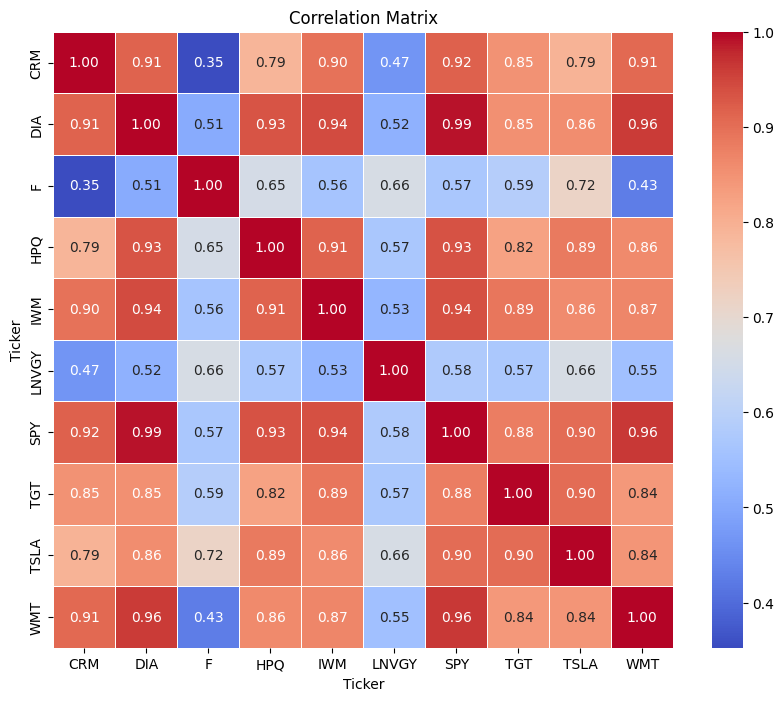

In [58]:
## Then plot the correlation matrix by using features of the seaborn and matplotlib libraries.
# Credit to Lindalin1234 for the code to plot the correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [59]:
## Backtest
# Now I will calculate the correlation matrix by using daily return data instead of adjusted close price data. 
ret_correlation_matrix = my_port_d_returns.corr() # A new variable is defined to indicate that this correlation matrix was calculated by using daily return data.
ret_correlation_matrix

Ticker,CRM,DIA,F,HPQ,IWM,LNVGY,SPY,TGT,TSLA,WMT
Ticker,,,,,,,,,,
CRM,1.000000,0.510681,0.175982,0.226606,0.398638,0.077134,0.559131,0.050567,0.260074,0.043969
DIA,0.510681,1.000000,0.514735,0.496757,0.769052,0.174204,0.892813,0.361879,0.406859,0.301813
F,0.175982,0.514735,1.000000,0.364576,0.563438,0.109880,0.475296,0.272104,0.326255,0.099128
HPQ,0.226606,0.496757,0.364576,1.000000,0.506626,0.104196,0.506208,0.293573,0.232742,0.080451
IWM,0.398638,0.769052,0.563438,0.506626,1.000000,0.255496,0.757500,0.377099,0.447507,0.164172
LNVGY,0.077134,0.174204,0.109880,0.104196,0.255496,1.000000,0.196995,0.091156,0.073117,0.048061
SPY,0.559131,0.892813,0.475296,0.506208,0.757500,0.196995,1.000000,0.297797,0.526203,0.249282
TGT,0.050567,0.361879,0.272104,0.293573,0.377099,0.091156,0.297797,1.000000,0.123217,0.238984
TSLA,0.260074,0.406859,0.326255,0.232742,0.447507,0.073117,0.526203,0.123217,1.000000,0.120011


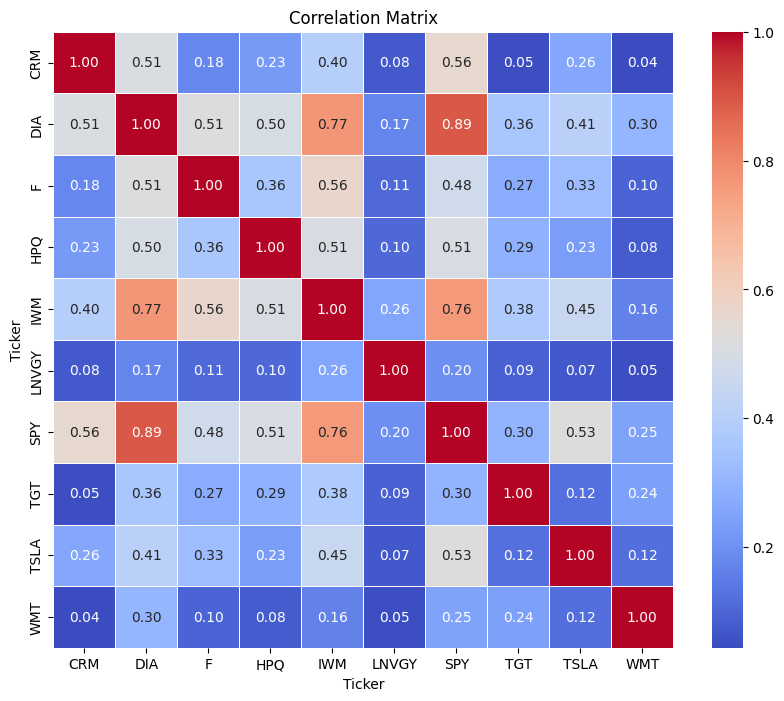

In [60]:
## Then plot the daily return data correlation matrix by using features of the seaborn and matplotlib libraries.
plt.figure(figsize=(10, 8))
sns.heatmap(ret_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [61]:
## The code below was another way that we tried to calculate the Average Weekly Drawdown, 1g.

In [62]:
'''
## Calculation of 1g., Average Weekly Drawdown, (52-week Low minus 52-week High) / 52-week High

## First, calculate the 52 week low.

# Create an empty DataFrame to store the data
my_port_table = pd.DataFrame()


# Fetch historical data for each stock
for ticker in my_tickers:
    stock = yf.Ticker(ticker)
    historical_data = stock.history(period='1y')  # Fetch 1-year historical data
    my_port_table[ticker] = historical_data['Low']

# Calculate the 52-week low for each stock
my_port_table['52-week Low'] = my_port_table.min(axis=1)

print(my_port_table[['52-week Low']])
''' 

"\n## Calculation of 1g., Average Weekly Drawdown, (52-week Low minus 52-week High) / 52-week High\n\n## First, calculate the 52 week low.\n\n# Create an empty DataFrame to store the data\nmy_port_table = pd.DataFrame()\n\n\n# Fetch historical data for each stock\nfor ticker in my_tickers:\n    stock = yf.Ticker(ticker)\n    historical_data = stock.history(period='1y')  # Fetch 1-year historical data\n    my_port_table[ticker] = historical_data['Low']\n\n# Calculate the 52-week low for each stock\nmy_port_table['52-week Low'] = my_port_table.min(axis=1)\n\nprint(my_port_table[['52-week Low']])\n"

In [63]:

'''
## Then calculate 52-week high 
# Fetch historical data for each stock
for ticker in my_tickers:
    stock = yf.Ticker(ticker)
    historical_data = stock.history(period='1y')  # Fetch 1-year historical data
    my_port_table[ticker] = historical_data['High']

# Calculate the 52-week low for each stock
my_port_table['52-week High'] = my_port_table.max(axis=1)
'''


"\n## Then calculate 52-week high \n# Fetch historical data for each stock\nfor ticker in my_tickers:\n    stock = yf.Ticker(ticker)\n    historical_data = stock.history(period='1y')  # Fetch 1-year historical data\n    my_port_table[ticker] = historical_data['High']\n\n# Calculate the 52-week low for each stock\nmy_port_table['52-week High'] = my_port_table.max(axis=1)\n"

In [64]:
'''
## Now calculate the Average Weekly Drawdown, (52-week Low minus 52-week High) / 52-week High
av__w_drawdown = ((my_port_table['52-week Low'] - my_port_table['52-week High']) / my_port_table['52-week High']) * 100
'''


"\n## Now calculate the Average Weekly Drawdown, (52-week Low minus 52-week High) / 52-week High\nav__w_drawdown = ((my_port_table['52-week Low'] - my_port_table['52-week High']) / my_port_table['52-week High']) * 100\n"

In [65]:
'''
my_port_table = pd.DataFrame(av__w_drawdown, columns=['Average Weekly Drawdown'], index=my_tickers)
my_port_table
''' 

"\nmy_port_table = pd.DataFrame(av__w_drawdown, columns=['Average Weekly Drawdown'], index=my_tickers)\nmy_port_table\n"

In [66]:

## This is how we attempted to calculate the values for number 3 in the project.
'''
ETF_tickers = ['SPY', 'IWM', 'DIA']
ETF_data = yf.download(start=start_date, end=end_date, tickers=ETF_tickers)
ETF_data.head()
ETF_data = ETF_data['Adj Close']
ETF_data.head()

Port_and_ETF_data = {
    'portfolio data': my_port,
     'ETF data': ETF_data
}

All_Tickers = my_tickers.extend(ETF_tickers)
print(All_Tickers)

'''






"\nETF_tickers = ['SPY', 'IWM', 'DIA']\nETF_data = yf.download(start=start_date, end=end_date, tickers=ETF_tickers)\nETF_data.head()\nETF_data = ETF_data['Adj Close']\nETF_data.head()\n\nPort_and_ETF_data = {\n    'portfolio data': my_port,\n     'ETF data': ETF_data\n}\n\nAll_Tickers = my_tickers.extend(ETF_tickers)\nprint(All_Tickers)\n\n"

In [67]:
'''
Port_and_ETF_table = pd.DataFrame(Port_and_ETF_data)
ETF_table = pd.DataFrame(ETF_data,columns=['Adj Close'], index=ETF_tickers)
ETF_table
'''

"\nPort_and_ETF_table = pd.DataFrame(Port_and_ETF_data)\nETF_table = pd.DataFrame(ETF_data,columns=['Adj Close'], index=ETF_tickers)\nETF_table\n"